In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
X=np.load("../input/pooled-output-last-4-10-epochs/bert_10_epochs_embeddings_summed_last_4_output.npy")
Y=np.load("../input/pooled-output-last-4-10-epochs/targets.npy")

In [3]:
import pickle
with open("../input/10-epochs-bert/targets_final.pkl","rb") as f:
    Y=pickle.load(f)

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2,stratify=Y)

In [6]:
import optuna

In [7]:
from sklearn.model_selection import cross_val_score
def objective(trial):
    params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
            'max_depth': trial.suggest_int('max_depth', 4, 50)
        }
    clf = RandomForestClassifier(random_state=42,**params)
    return cross_val_score(clf,X_train,Y_train,n_jobs=-1,cv=4).mean()

In [8]:
study=optuna.create_study(direction='maximize',study_name="Random_forest_trial")
study.optimize(objective,n_trials=10)

[I 2022-05-26 22:06:49,604] A new study created in memory with name: Random_forest_trial
[I 2022-05-26 22:06:58,007] Trial 0 finished with value: 0.9778256621910306 and parameters: {'n_estimators': 145, 'max_depth': 34}. Best is trial 0 with value: 0.9778256621910306.
[I 2022-05-26 22:07:35,448] Trial 1 finished with value: 0.9782565107235883 and parameters: {'n_estimators': 802, 'max_depth': 20}. Best is trial 1 with value: 0.9782565107235883.
[I 2022-05-26 22:08:21,858] Trial 2 finished with value: 0.9782565107235883 and parameters: {'n_estimators': 937, 'max_depth': 32}. Best is trial 1 with value: 0.9782565107235883.
[I 2022-05-26 22:08:27,450] Trial 3 finished with value: 0.9769645210595057 and parameters: {'n_estimators': 112, 'max_depth': 42}. Best is trial 1 with value: 0.9782565107235883.
[I 2022-05-26 22:08:38,018] Trial 4 finished with value: 0.9780409938017111 and parameters: {'n_estimators': 208, 'max_depth': 45}. Best is trial 1 with value: 0.9782565107235883.
[I 2022-05-

In [9]:
trial=study.best_trial
for key, value in trial.params.items():
    print('\t\t{}: {}'.format(key, value))

		n_estimators: 515
		max_depth: 23


In [10]:
clf = RandomForestClassifier(random_state=42,**trial.params)

In [11]:
clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=23, n_estimators=515, random_state=42)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'BHO'),
  Text(1.5, 0, 'CeeInject'),
  Text(2.5, 0, 'FakeRean'),
  Text(3.5, 0, 'OnLineGames'),
  Text(4.5, 0, 'Renos'),
  Text(5.5, 0, 'Vobfus'),
  Text(6.5, 0, 'Winwebsec')])

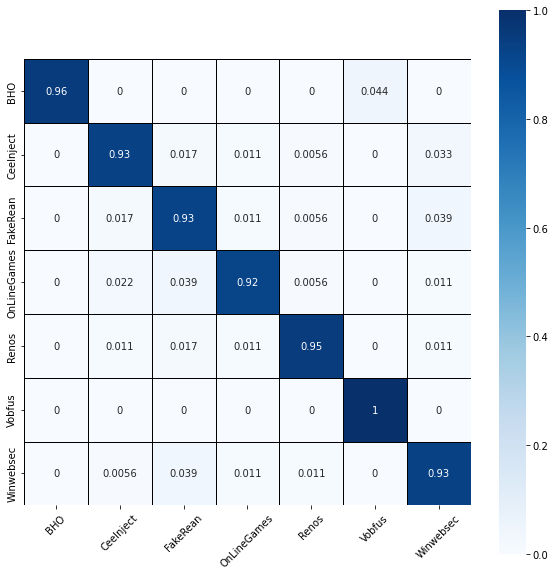

In [12]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)

In [13]:
clf.score(X_test,Y_test)

0.9466437177280551

In [14]:
clf.score(X_test,Y_test)

0.9466437177280551

In [15]:
from sklearn.svm import SVC

In [16]:
def objective(trial):
    svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
    classifier_obj = SVC(C=svc_c,kernel="rbf",gamma="scale")
    return cross_val_score(classifier_obj,X_train,Y_train,n_jobs=-1,cv=4).mean()

In [17]:
study=optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=10)

[I 2022-05-26 22:11:36,661] A new study created in memory with name: no-name-af97f51b-2c88-45a5-bbbe-a6617cb5facc
[I 2022-05-26 22:11:37,653] Trial 0 finished with value: 0.976964150437112 and parameters: {'svc_c': 7989826.7992187515}. Best is trial 0 with value: 0.976964150437112.
[I 2022-05-26 22:11:50,244] Trial 1 finished with value: 0.1868676255409234 and parameters: {'svc_c': 2.8986718649399047e-09}. Best is trial 0 with value: 0.976964150437112.
[I 2022-05-26 22:12:02,563] Trial 2 finished with value: 0.1868676255409234 and parameters: {'svc_c': 0.0005681140387115589}. Best is trial 0 with value: 0.976964150437112.
[I 2022-05-26 22:12:14,671] Trial 3 finished with value: 0.1868676255409234 and parameters: {'svc_c': 1.744924493240739e-09}. Best is trial 0 with value: 0.976964150437112.
[I 2022-05-26 22:12:15,634] Trial 4 finished with value: 0.976964150437112 and parameters: {'svc_c': 273192277.60965115}. Best is trial 0 with value: 0.976964150437112.
[I 2022-05-26 22:12:25,438] 

In [18]:
trial=study.best_trial
clf=SVC(C=trial.params["svc_c"],kernel="rbf",gamma="scale")
clf.fit(X_train,Y_train)

SVC(C=7989826.7992187515)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'BHO'),
  Text(0, 1.5, 'CeeInject'),
  Text(0, 2.5, 'FakeRean'),
  Text(0, 3.5, 'OnLineGames'),
  Text(0, 4.5, 'Renos'),
  Text(0, 5.5, 'Vobfus'),
  Text(0, 6.5, 'Winwebsec')])

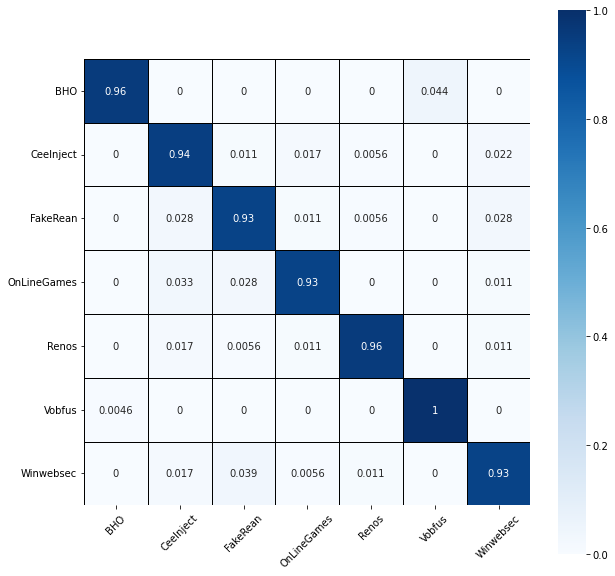

In [19]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)
plt.yticks(rotation=0)

In [20]:
clf.score(X_test,Y_test)

0.9483648881239243

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
clf=KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=25)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'BHO'),
  Text(1.5, 0, 'CeeInject'),
  Text(2.5, 0, 'FakeRean'),
  Text(3.5, 0, 'OnLineGames'),
  Text(4.5, 0, 'Renos'),
  Text(5.5, 0, 'Vobfus'),
  Text(6.5, 0, 'Winwebsec')])

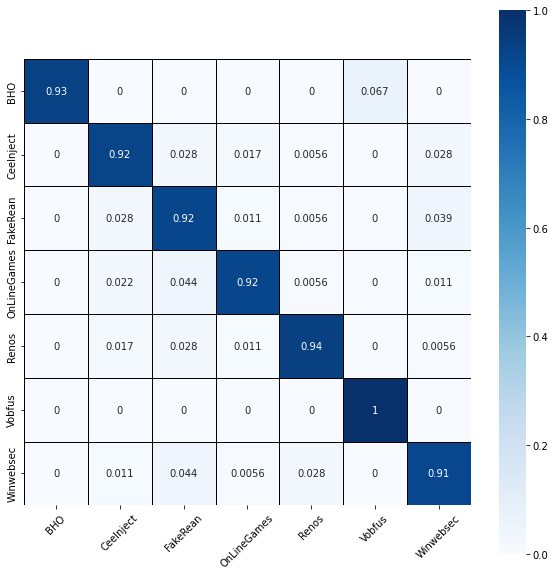

In [23]:
cf=confusion_matrix(Y_test,clf.predict(X_test),normalize="true")
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(cf, annot=True,cmap="Blues",linewidth=1,linecolor="black",square=True,vmax=1.0)
ax.set_xticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
ax.set_yticklabels(["BHO","CeeInject","FakeRean","OnLineGames","Renos","Vobfus","Winwebsec"])
plt.xticks(rotation=45)

In [24]:
clf.score(X_test,Y_test)

0.9363166953528399